In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from os.path import isfile, join
from os import listdir
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import numpy as np
#import textblob
import pandas as pd
import pickle
import autosklearn.classification

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
vc_invest1 = pd.read_csv("../data/processed/PitchBook_CA_VCInvest=1_NLP-features.csv")

In [7]:
vc_invest0 = pd.read_csv("../data/processed/PitchBook_CA_VCInvest=0_NLP-features.csv")

In [8]:
vc_invest1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 36 columns):
Unnamed: 0                     123 non-null int64
Unnamed: 0.1                   123 non-null int64
Company ID                     123 non-null object
Description                    123 non-null object
Company Name                   123 non-null object
HQ Post Code                   123 non-null object
Primary Industry Code          123 non-null object
Primary Contact                123 non-null object
Year Founded                   123 non-null float64
Active Investors               120 non-null object
HQ Location                    123 non-null object
Growth Rate                    123 non-null float64
Size Multiple                  123 non-null float64
Last Financing Date            108 non-null object
Last Financing Size            123 non-null float64
Last Financing Deal Type 2     39 non-null object
Majestic Referring Domains     123 non-null float64
Facebook Likes            

In [9]:
vc_invest1['vc_invest'] = vc_invest1.VC_invested

In [10]:
vc_invest1.drop('VC_invested',axis=1, inplace=True) # make the columns match

In [11]:
vc_invest0['Last Financing Size']  

0     0.15
1     0.12
2     0.10
3     0.75
4     0.99
5     0.15
6     0.09
7     0.09
8     2.00
9     0.12
10    0.10
11    0.12
12    0.30
13    0.01
14    0.02
15    0.03
16    0.40
17    0.13
18    0.02
19    0.68
20    0.01
21    0.03
22    0.01
23    0.02
24    0.02
25    0.03
26    0.20
27    0.02
28    0.50
29    0.20
      ... 
62    2.00
63    0.03
64    3.25
65    3.20
66    0.03
67    0.15
68    1.57
69    0.25
70    0.05
71    0.40
72    1.32
73    0.88
74    0.03
75    0.75
76    0.05
77    0.30
78    0.03
79    0.04
80    0.02
81    0.02
82    0.39
83    0.01
84    0.58
85    0.01
86    2.00
87    0.10
88    0.25
89    0.12
90    0.12
91    0.38
Name: Last Financing Size, Length: 92, dtype: float64

In [12]:
vc_invest0 ['Total Raised']

0     0.370
1     0.120
2     0.100
3     1.250
4     0.465
5     0.465
6     0.090
7     0.090
8     6.640
9     0.120
10    0.100
11    0.120
12    0.300
13    0.010
14    0.020
15    0.030
16    0.650
17    0.130
18    0.070
19    0.680
20    1.150
21    0.030
22    0.465
23    0.020
24    0.020
25    0.030
26    0.200
27    0.070
28    0.930
29    0.200
      ...  
62    2.000
63    0.030
64    7.250
65    3.200
66    0.040
67    0.150
68    1.570
69    0.250
70    0.050
71    0.400
72    1.820
73    1.210
74    0.030
75    0.750
76    0.050
77    0.960
78    1.900
79    0.040
80    0.120
81    0.465
82    0.390
83    0.010
84    0.670
85    0.010
86    3.600
87    0.130
88    0.250
89    0.120
90    0.270
91    0.380
Name: Total Raised, Length: 92, dtype: float64

In [13]:
vc_invest0 .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 38 columns):
Unnamed: 0                     92 non-null int64
Unnamed: 0.1                   92 non-null int64
Company ID                     92 non-null object
Description                    92 non-null object
Company Name                   92 non-null object
HQ Post Code                   92 non-null int64
Primary Industry Code          92 non-null object
Primary Contact                92 non-null object
Year Founded                   92 non-null float64
Active Investors               56 non-null object
HQ Location                    92 non-null object
Growth Rate                    92 non-null float64
Size Multiple                  92 non-null float64
Last Financing Date            92 non-null object
Last Financing Size            92 non-null float64
Last Financing Valuation       17 non-null float64
Last Financing Deal Type 2     54 non-null object
Majestic Referring Domains     92 non-null fl

In [14]:
vc_invest0['Primary Industry Code'].unique() #  one hot encode this

array(['Network Management Software', 'Electronics (B2C)',
       'Other Business Products and Services', 'Internet Retail',
       'Therapeutic Devices', 'Social/Platform Software',
       'Application Software', 'Social Content', 'Human Capital Services',
       'Automotive', 'Movies, Music and Entertainment',
       'Real Estate Services (B2C)', 'Other Healthcare Services',
       'Other Healthcare Technology Systems', 'Other Commercial Services',
       'Information Services (B2C)', 'Consulting Services (B2B)',
       'Other Software', 'Other Consumer Products and Services',
       'Business/Productivity Software', 'Other Financial Services',
       'Entertainment Software', 'Other Energy Services',
       'Other Consumer Durables', 'Aerospace and Defense',
       'Broadcasting, Radio and Television', 'Leisure Facilities',
       'Wireless Service Providers', 'Legal Services (B2C)',
       'Educational and Training Services (B2C)',
       'Media and Information Services (B2B)',
   

# Combine dataframes

In [15]:
combo_df = pd.concat(objs=[vc_invest0,vc_invest1])

In [16]:
combo_df.tail()

,Active Investors,Company ID,Company Name,Description,Employees,Facebook Likes,Growth Rate,HQ Location,HQ Post Code,Last Financing Date,...,days_since_offer,disgust,emotional_range_big5,extraversion_big5,fear,joy,openness_big5,sadness,tentative,vc_invest
118,"Anjan Mitra, Dorm Room Fund, Emily Mitra, Erik...",106663-87,Traveling Spoon,Developer of an online platform designed to bo...,2.0,19126.0,0.416151,"San Francisco, CA",94110,2015-09-17,...,NaN,0.047489,0.703120,0.890312,0.044991,0.693290,0.630364,0.088702,0.460577,1
119,"Accel, New Enterprise Associates",167364-55,TravelBank,Developer of travel and expense software for s...,11.0,916.0,4.039472,"San Francisco, CA",94107,2016-10-20,...,NaN,0.057233,0.811919,0.889738,0.054336,0.606031,0.136577,0.099967,0.072408,1
120,NaN,58446-37,Translucent Medical,Provider of a navigation system for reducing X...,18.0,867.0,0.022076,"Santa Cruz, CA",95060,NaN,...,NaN,0.083238,0.756500,0.655030,0.100901,0.528576,0.358868,0.457484,0.378413,1
121,"Amplify.LA, Canyon Creek Capital, HillsVen Cap...",90366-58,Translation Exchange,Provider of a cloud-based platform for continu...,11.0,200.0,3.822225,"San Francisco, CA",94105,2016-03-01,...,NaN,0.248178,0.750920,0.300239,0.127519,0.298173,0.264759,0.369778,0.689846,1
122,"1776, Alex Bresler, BallstonBID LaunchPad, Bru...",95609-35,TransitScreen,Provider of a real-time transportation display...,18.0,774.0,0.135018,"Washington, DC",20005,2017-02-24,...,NaN,0.090445,0.608507,0.564447,0.111090,0.441729,0.474643,0.409736,0.353829,1


In [17]:
combo_df.head()

,Active Investors,Company ID,Company Name,Description,Employees,Facebook Likes,Growth Rate,HQ Location,HQ Post Code,Last Financing Date,...,days_since_offer,disgust,emotional_range_big5,extraversion_big5,fear,joy,openness_big5,sadness,tentative,vc_invest
0,"500 Startups, Start Smart Labs",170123-59,Zyudly Labs,Provider of cyber-security analytics and intel...,7.0,103.0,0.118048,"Palo Alto, CA",94306,2017-02-08,...,121.0,0.100205,0.733407,0.632116,0.377408,0.514982,0.410378,0.283647,0.274317,0
1,eLab Accelerator,123484-96,Zunn Labs,Developer of application controlled LED lights...,7.0,846.0,-0.021589,"Los Angeles, CA",90025,2014-12-20,...,902.0,0.049665,0.779365,0.711512,0.145806,0.339845,0.164799,0.363050,0.319869,0
2,NaN,170046-01,Zuma 4 Productions,The company is currently operating in Stealth ...,7.0,816.0,0.000000,"Malibu, CA",90265,2017-01-26,...,134.0,0.031524,0.464414,0.785069,0.054562,0.769597,0.305475,0.179980,0.364754,0
3,NaN,102923-56,Zulu,Provider of a community-based grocery shopping...,6.0,21.0,0.000000,"Sunnyvale, CA",94085,2014-06-01,...,1104.0,0.059154,0.267228,0.304023,0.097972,0.203800,0.136727,0.127828,0.000000,0
4,California Institute for Quantitative Bioscien...,123222-43,ZoneOne Pharma,Developer of nano-scale therapeutics. The comp...,7.0,816.0,0.000000,"San Francisco, CA",94158,2015-05-01,...,770.0,0.043056,0.532335,0.665466,0.052714,0.502585,0.713422,0.101492,0.448915,0


In [18]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 122
Data columns (total 38 columns):
Active Investors               176 non-null object
Company ID                     215 non-null object
Company Name                   215 non-null object
Description                    215 non-null object
Employees                      215 non-null float64
Facebook Likes                 215 non-null float64
Growth Rate                    215 non-null float64
HQ Location                    215 non-null object
HQ Post Code                   215 non-null object
Last Financing Date            200 non-null object
Last Financing Deal Type 2     93 non-null object
Last Financing Size            215 non-null float64
Last Financing Valuation       17 non-null float64
Majestic Referring Domains     215 non-null float64
Primary Contact                215 non-null object
Primary Industry Code          215 non-null object
Size Multiple                  215 non-null float64
Total Raised           

# Add in LDA feaures across all founders

In [19]:
mypath_vc_zero  = "../data/raw/founders_tweets/vc_invest=0/"
mypath_vc_one = "../data/raw/founders_tweets/vc_invest=1/"


# Get all the text from VC invest one and vc invest zero
vc_doc_list = []
vc_founder_company_name_handle_list = [] # founder names index corresponds to their doc in the vc doc list

# vc invest one
for f in listdir(mypath_vc_zero):

    if isfile(join(mypath_vc_zero, f)):
        founder_text = ""
        with open(join(mypath_vc_zero, f),'rb') as fp:
            founder_tweet = pickle.load(fp)
            joined_text = founder_text.join(founder_tweet )
            vc_doc_list.append(joined_text)
            vc_founder_company_name_handle_list.append(f)

            
# vc invest zero
for f in listdir(mypath_vc_one):
    if isfile(join(mypath_vc_one, f)):
        founder_text = ""
        with open(join(mypath_vc_one, f),'rb') as fp:
            founder_tweet = pickle.load(fp)
            joined_text = founder_text.join(founder_tweet )
            vc_doc_list.append(joined_text)
            vc_founder_company_name_handle_list.append(f)
            
    
    
# number of features for LDA
no_features  = 10_000


# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=1, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(vc_doc_list)
tf_feature_names = tf_vectorizer.get_feature_names()




n_topics = 5





lda_model = LatentDirichletAllocation(n_topics=n_topics, max_iter=5, 
                                      learning_method='online', learning_offset=50.,random_state=0).fit(tf)




lda_W = lda_model.transform(tf) # documents as the rows, topics as the columns
lda_H = lda_model.components_ # topics as the rows, words as the columns

In [20]:
vc_founder_company_name_handle_list [0]

'Spectafy-Eric Watson-EricWattage'

In [21]:
def return_percent_of_topic(input_df, lda_W, vc_founder_company_name_handle_list):
    "Return a dataframe that has the percent of each topic for the given number of topics in the LDA model.\
    input_df should be the combined VC invest zero vc invest one dataframes\
    lda_w is the W matrix from the LDA decomposition rows are documents columns are topics\
    vc_founder_... is a list that shows the index of the text from each founder in the lda_W matrix"
    c = 0
    num_topics =lda_W.shape[1] # number of topics for LDA
    # create a new DF to return
    new_df = input_df.copy()
    # get a list of the LDA features
    lda_topics = []
    for row in input_df.iterrows():
        row = row[1]
        # Look up the index within the LDA model
        key_lookup = row['Company Name']+"-"+row["Primary Contact"]+"-"+row["Twitter_Username"]
        # index of the founders text for the LDA_W matrix
        founder_index = vc_founder_company_name_handle_list.index(key_lookup)
        lda_topics.append(lda_W[founder_index,:])

    # the new topics
    lda_topics = np.array(lda_topics)
    # Get columns names
    col_names = ['topic_'+str(i+1)+'_percent' for i in range(num_topics)]
    # Create new data from to join on 
    topic_df = pd.DataFrame(lda_topics,columns=col_names)
    # merge the dataframes together
    final_df = topic_df.join(new_df)
    return final_df
        
    
#     for topic_idx, topic in enumerate(lda_W):
#         for topic_percent in range(len(topic)):
#             #print(f"""Document {topic_idx} has the following percent of each topic  {topic_percent} = {topic[topic_percent]:.2%}""")
#             c +=1
#             if c ==10:
#                 break

In [22]:
final_combo_df = return_percent_of_topic(combo_df,lda_W, vc_founder_company_name_handle_list)

In [23]:
final_combo_df.head()

,topic_1_percent,topic_2_percent,topic_3_percent,topic_4_percent,topic_5_percent,Active Investors,Company ID,Company Name,Description,Employees,...,days_since_offer,disgust,emotional_range_big5,extraversion_big5,fear,joy,openness_big5,sadness,tentative,vc_invest
0,0.000600,0.000611,0.000606,0.000606,0.997577,"500 Startups, Start Smart Labs",170123-59,Zyudly Labs,Provider of cyber-security analytics and intel...,7.0,...,121.0,0.100205,0.733407,0.632116,0.377408,0.514982,0.410378,0.283647,0.274317,0.0
0,0.000600,0.000611,0.000606,0.000606,0.997577,"Bialla Venture Partners, National Science Foun...",62229-34,Zyante,"Developer of animated, interactive learning ma...",32.0,...,NaN,0.045468,0.447831,0.567102,0.053601,0.532597,0.228463,0.353646,0.231589,1.0
1,0.000944,0.321392,0.000959,0.000952,0.675753,eLab Accelerator,123484-96,Zunn Labs,Developer of application controlled LED lights...,7.0,...,902.0,0.049665,0.779365,0.711512,0.145806,0.339845,0.164799,0.363050,0.319869,0.0
1,0.000944,0.321392,0.000959,0.000952,0.675753,"COLOPL, Max Levchin, Novator Partners, Samchul...",117491-32,Zwift,Provider of interactive fitness entertainment ...,70.0,...,NaN,0.265767,0.373390,0.395457,0.112630,0.262345,0.427759,0.307834,0.858374,1.0
2,0.718866,0.280629,0.000169,0.000167,0.000168,NaN,170046-01,Zuma 4 Productions,The company is currently operating in Stealth ...,7.0,...,134.0,0.031524,0.464414,0.785069,0.054562,0.769597,0.305475,0.179980,0.364754,0.0


In [24]:
final_combo_df.columns

Index(['topic_1_percent', 'topic_2_percent', 'topic_3_percent',
       'topic_4_percent', 'topic_5_percent', 'Active Investors', 'Company ID',
       'Company Name', 'Description', 'Employees', 'Facebook Likes',
       'Growth Rate', 'HQ Location', 'HQ Post Code', 'Last Financing Date',
       'Last Financing Deal Type 2 ', 'Last Financing Size',
       'Last Financing Valuation', 'Majestic Referring Domains',
       'Primary Contact', 'Primary Industry Code', 'Size Multiple',
       'Total Raised', 'Twitter Followers', 'Twitter_Username', 'Unnamed: 0',
       'Unnamed: 0.1', 'Year Founded', 'agreeableness_big5', 'analytical',
       'anger', 'confident', 'conscientiousness_big5', 'days_since_offer',
       'disgust', 'emotional_range_big5', 'extraversion_big5', 'fear', 'joy',
       'openness_big5', 'sadness', 'tentative', 'vc_invest'],
      dtype='object')

# Select columns for the data model
- Company ID  (primary key)
- Employees
- Facebook Likes
- Growth Rate
- HQ Post Code
- Last Financing Size
- Majestic Referring Domains
- Primary Industry Code( use PD get dummies to use in model)
- Size Multiple
- Total Raised
- Twitter Followers
- Year Founded
- agreeableness_big5
- analytical
- anger
- confident
- conscientiousness_big5
- disgust
- emotional_range_big5
- extraversion_big5
- fear
- joy 
- openness_big5
- sadness
- tentative
- vc_invest (columns to predict)
- topics 1-15

In [59]:
training_df = final_combo_df[['Company ID', 'Employees','Facebook Likes','Growth Rate','HQ Post Code','Last Financing Size',
         'Majestic Referring Domains','Primary Industry Code','Size Multiple','Total Raised','Twitter Followers',
         'Year Founded','agreeableness_big5','analytical','anger','confident','conscientiousness_big5',
         'disgust','emotional_range_big5','extraversion_big5','fear','joy','openness_big5','sadness','tentative',
         'vc_invest','topic_1_percent', 'topic_2_percent', 'topic_3_percent',
       'topic_4_percent', 'topic_5_percent']]

### Turn HQ Post Code into an int

In [60]:
hq_post_code = []
cleaned_final_df = training_df .copy()
for row in training_df['HQ Post Code']:
    try:
        hq_post_code.append(int(row))
    except:
        hq_post_code.append("NaN")

In [61]:
cleaned_final_df ['HQ_post_code'] = hq_post_code

In [62]:
cleaned_final_df .drop(['HQ Post Code'],axis=1,inplace=True)

In [63]:
cleaned_final_df = cleaned_final_df[cleaned_final_df['HQ_post_code']!='NaN']

In [64]:
 cleaned_final_df.HQ_post_code = cleaned_final_df.HQ_post_code.astype('int64')

In [65]:
 cleaned_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 122
Data columns (total 31 columns):
Company ID                    210 non-null object
Employees                     210 non-null float64
Facebook Likes                210 non-null float64
Growth Rate                   210 non-null float64
Last Financing Size           210 non-null float64
Majestic Referring Domains    210 non-null float64
Primary Industry Code         210 non-null object
Size Multiple                 210 non-null float64
Total Raised                  210 non-null float64
Twitter Followers             210 non-null float64
Year Founded                  210 non-null float64
agreeableness_big5            210 non-null float64
analytical                    210 non-null float64
anger                         210 non-null float64
confident                     210 non-null float64
conscientiousness_big5        210 non-null float64
disgust                       210 non-null float64
emotional_range_big5          

# Turn company ID into an int

In [66]:
int_company_id = []
for row in cleaned_final_df['Company ID']:
    new_id = ""
    first,second = row.split("-")
    new_id+=first
    new_id+=second
    int_company_id.append(int(new_id))

In [67]:
 cleaned_final_df['company_id'] = int_company_id

In [68]:
# drop the old company id
cleaned_final_df.drop(['Company ID'],axis=1,inplace=True)

## Add a one hot encoding for the primary industry

In [69]:
final_training_df = pd.get_dummies(cleaned_final_df['Primary Industry Code'])

In [70]:
final_training_df.columns

Index(['Aerospace and Defense', 'Alternative Energy Equipment',
       'Application Software', 'Application Specific Semiconductors',
       'Automation/Workflow Software', 'Automotive', 'Beverages',
       'Broadcasting, Radio and Television', 'Business/Productivity Software',
       'Communication Software', 'Consulting Services (B2B)',
       'Consumer Finance', 'Database Software', 'Drug Discovery',
       'Education and Training Services (B2B)',
       'Educational and Training Services (B2C)', 'Electrical Equipment',
       'Electronic Components', 'Electronics (B2C)', 'Energy Exploration',
       'Energy Production', 'Enterprise Systems (Healthcare)',
       'Entertainment Software', 'Environmental Services (B2B)',
       'Food Products', 'General Purpose Semiconductors', 'Hotels and Resorts',
       'Human Capital Services', 'Information Services (B2C)',
       'Internet Retail', 'Legal Services (B2C)', 'Leisure Facilities',
       'Logistics', 'Media and Information Services (

In [71]:
training_df = pd.concat(objs=[cleaned_final_df,final_training_df],axis=1)

In [72]:
cols = training_df.columns

In [73]:
cols

Index(['Employees', 'Facebook Likes', 'Growth Rate', 'Last Financing Size',
       'Majestic Referring Domains', 'Primary Industry Code', 'Size Multiple',
       'Total Raised', 'Twitter Followers', 'Year Founded',
       'agreeableness_big5', 'analytical', 'anger', 'confident',
       'conscientiousness_big5', 'disgust', 'emotional_range_big5',
       'extraversion_big5', 'fear', 'joy', 'openness_big5', 'sadness',
       'tentative', 'vc_invest', 'topic_1_percent', 'topic_2_percent',
       'topic_3_percent', 'topic_4_percent', 'topic_5_percent', 'HQ_post_code',
       'company_id', 'Aerospace and Defense', 'Alternative Energy Equipment',
       'Application Software', 'Application Specific Semiconductors',
       'Automation/Workflow Software', 'Automotive', 'Beverages',
       'Broadcasting, Radio and Television', 'Business/Productivity Software',
       'Communication Software', 'Consulting Services (B2B)',
       'Consumer Finance', 'Database Software', 'Drug Discovery',
       'E

In [122]:
# move vc_invest to the first columns
# removed Last fundraiing size and total raise
# removed 'company_id',
training_df_final = training_df[['vc_invest', 'Employees', 'Facebook Likes', 'Growth Rate',
        'Majestic Referring Domains',
        'Size Multiple', 
       'Twitter Followers', 'Year Founded', 'agreeableness_big5', 'analytical',
       'anger', 'confident', 'conscientiousness_big5', 'disgust',
       'emotional_range_big5', 'extraversion_big5', 'fear', 'joy',
       'openness_big5', 'sadness', 'tentative', 'HQ_post_code',
        'topic_1_percent', 'topic_2_percent', 'topic_3_percent',
       'topic_4_percent', 'topic_5_percent',
       
                           
       'Aerospace and Defense', 'Alternative Energy Equipment',
       'Application Software', 'Application Specific Semiconductors',
       'Automation/Workflow Software', 'Automotive', 'Beverages',
       'Broadcasting, Radio and Television', 'Business/Productivity Software',
       'Communication Software', 'Consulting Services (B2B)',
       'Consumer Finance', 'Database Software', 'Drug Discovery',
       'Education and Training Services (B2B)',
       'Educational and Training Services (B2C)', 'Electrical Equipment',
       'Electronic Components', 'Electronics (B2C)', 'Energy Exploration',
       'Energy Production', 'Enterprise Systems (Healthcare)',
       'Entertainment Software', 'Environmental Services (B2B)',
       'Food Products', 'General Purpose Semiconductors', 'Hotels and Resorts',
       'Human Capital Services', 'Information Services (B2C)',
       'Internet Retail', 'Legal Services (B2C)', 'Leisure Facilities',
       'Logistics', 'Media and Information Services (B2B)',
       'Movies, Music and Entertainment', 'Network Management Software',
       'Other Business Products and Services', 'Other Commercial Products',
       'Other Commercial Services', 'Other Consumer Durables',
       'Other Consumer Products and Services', 'Other Devices and Supplies',
       'Other Energy Services', 'Other Financial Services',
       'Other Healthcare Services', 'Other Healthcare Technology Systems',
       'Other Restaurants, Hotels and Leisure', 'Other Software',
       'Private Equity', 'Publishing', 'Real Estate Services (B2C)',
       'Security Services (B2B)', 'Social Content', 'Social/Platform Software',
       'Specialty Retail', 'Surgical Devices', 'Therapeutic Devices',
       'Water Utilities', 'Wireless Service Providers']]

In [123]:
training_df_final.head()

,vc_invest,Employees,Facebook Likes,Growth Rate,Majestic Referring Domains,Size Multiple,Twitter Followers,Year Founded,agreeableness_big5,analytical,...,Publishing,Real Estate Services (B2C),Security Services (B2B),Social Content,Social/Platform Software,Specialty Retail,Surgical Devices,Therapeutic Devices,Water Utilities,Wireless Service Providers
0,0.0,7.0,103.0,0.118048,29.0,0.469278,6.0,2016.0,0.195558,0.493357,...,0,0,0,0,0,0,0,0,0,0
0,1.0,32.0,612.0,0.078953,83.0,0.760068,267.0,2012.0,0.608447,0.309870,...,1,0,0,0,0,0,0,0,0,0
1,0.0,7.0,846.0,-0.021589,15.0,0.755605,410.0,2012.0,0.523723,0.357739,...,0,0,0,0,0,0,0,0,0,0
1,1.0,70.0,158746.0,0.143940,471.0,73.107156,24569.0,2014.0,0.532005,0.172288,...,0,0,0,0,0,0,0,0,0,0
2,0.0,7.0,816.0,0.000000,25.0,0.906016,425.5,2016.0,0.664440,0.033400,...,0,0,0,0,0,0,0,0,0,0


# EDA

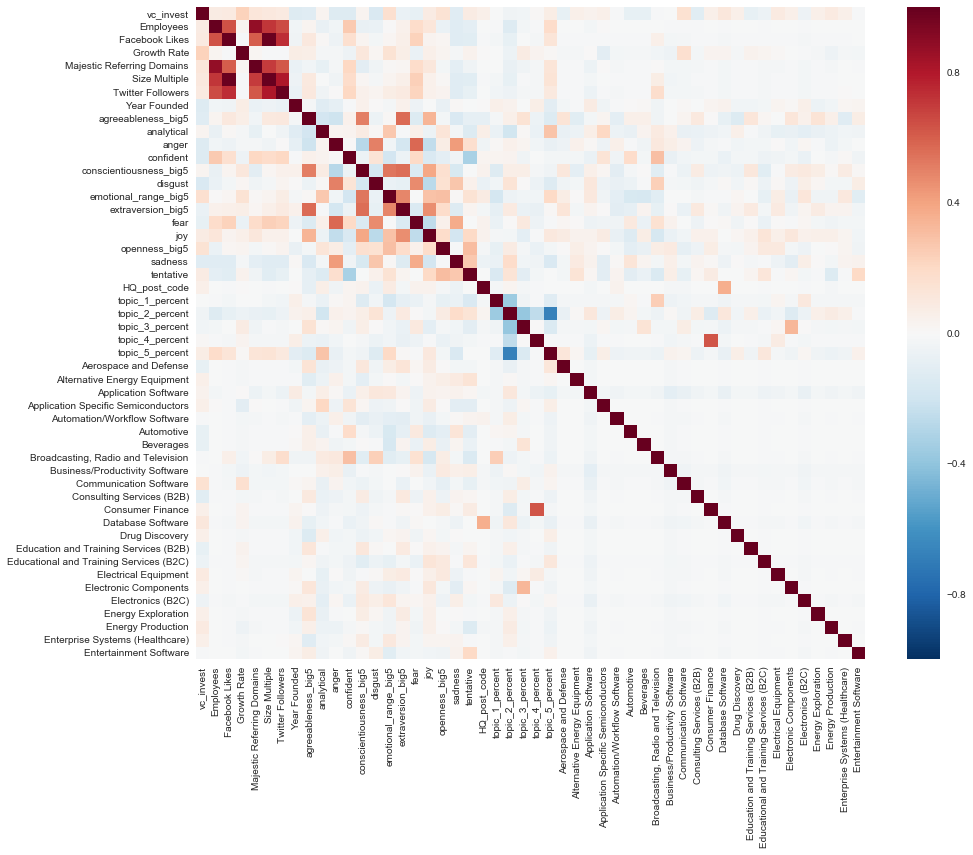

In [124]:
plt.figure(figsize=(15,12))
sns.heatmap(training_df_final.iloc[:,:50].corr());

## Last financing size by vc invest type
- People with VC funding are raising significantly more more

In [78]:
training_df[training_df.vc_invest==0]['Last Financing Size']

0     0.15
1     0.12
2     0.10
3     0.75
4     0.99
5     0.15
6     0.09
7     0.09
8     2.00
9     0.12
10    0.10
11    0.12
12    0.30
13    0.01
14    0.02
15    0.03
16    0.40
17    0.13
18    0.02
19    0.68
20    0.01
21    0.03
22    0.01
23    0.02
24    0.02
25    0.03
26    0.20
27    0.02
28    0.50
29    0.20
      ... 
62    2.00
63    0.03
64    3.25
65    3.20
66    0.03
67    0.15
68    1.57
69    0.25
70    0.05
71    0.40
72    1.32
73    0.88
74    0.03
75    0.75
76    0.05
77    0.30
78    0.03
79    0.04
80    0.02
81    0.02
82    0.39
83    0.01
84    0.58
85    0.01
86    2.00
87    0.10
88    0.25
89    0.12
90    0.12
91    0.38
Name: Last Financing Size, Length: 92, dtype: float64

In [79]:
vc_invest_0 = training_df[training_df.vc_invest==0]['Last Financing Size']*1_000_000

In [80]:
vc_invest_1 = training_df[training_df.vc_invest==1]['Last Financing Size']*1_000_000

In [81]:
vc_invest_1 .describe()['50%']/ vc_invest_0 .describe()['50%']

33.333333333333336

In [82]:
vc_invest_1 .describe()['mean']

11176440.677966101

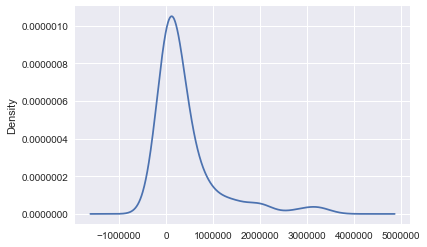

In [83]:
vc_invest_0.plot(kind='kde')


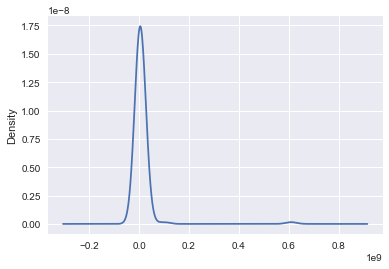

In [84]:
vc_invest_1 .plot(kind='kde')

# Look at the number of employees between VCinvest 1 VCinvest 0

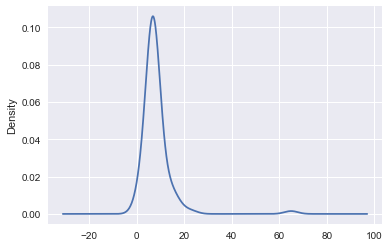

In [125]:
training_df[training_df.vc_invest==0]['Employees'].plot(kind='kde')


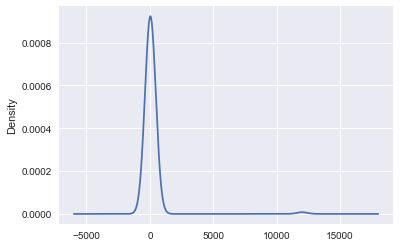

In [86]:
training_df[training_df.vc_invest==1]['Employees'].plot(kind='kde')

In [87]:
training_df[training_df.vc_invest==1]['Employees'].describe()

count      118.000000
mean       140.338983
std       1102.688263
min          2.000000
25%         11.000000
50%         18.000000
75%         40.750000
max      12000.000000
Name: Employees, dtype: float64

In [88]:
training_df[training_df.vc_invest==0]['Employees'].describe()

count    92.000000
mean      8.228261
std       6.975787
min       1.000000
25%       7.000000
50%       7.000000
75%       7.000000
max      65.000000
Name: Employees, dtype: float64

# train test split

In [126]:
x_all, y_all = training_df_final.iloc[:,1:], training_df.iloc[:,0]

In [127]:
x_all.columns

Index(['Employees', 'Facebook Likes', 'Growth Rate',
       'Majestic Referring Domains', 'Size Multiple', 'Twitter Followers',
       'Year Founded', 'agreeableness_big5', 'analytical', 'anger',
       'confident', 'conscientiousness_big5', 'disgust',
       'emotional_range_big5', 'extraversion_big5', 'fear', 'joy',
       'openness_big5', 'sadness', 'tentative', 'HQ_post_code',
       'topic_1_percent', 'topic_2_percent', 'topic_3_percent',
       'topic_4_percent', 'topic_5_percent', 'Aerospace and Defense',
       'Alternative Energy Equipment', 'Application Software',
       'Application Specific Semiconductors', 'Automation/Workflow Software',
       'Automotive', 'Beverages', 'Broadcasting, Radio and Television',
       'Business/Productivity Software', 'Communication Software',
       'Consulting Services (B2B)', 'Consumer Finance', 'Database Software',
       'Drug Discovery', 'Education and Training Services (B2B)',
       'Educational and Training Services (B2C)', 'Electric

In [128]:
X_train, X_val, y_train, y_val  = train_test_split(x_all,y_all,test_size=.25) # test is the final holdout set

In [129]:
X_train_, X_test, y_train_, y_test  = train_test_split(X_train,y_train,test_size=.20) 

In [130]:
X_train_.shape #  training examples

(125, 85)

In [131]:
y_train.values.reshape(-1,1).shape

(157, 1)

In [132]:
y_test.shape

(32,)

# train random forest + Logistic Regression

In [133]:
rf_classify = RandomForestClassifier(n_estimators=300)
log_regression = LogisticRegressionCV(cv = 3)

In [134]:
rf_classify.fit(X_train_.values,y_train_.values.reshape(-1,1))

/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [135]:
log_regression.fit(X_train_.values,y_train_.values.reshape(-1,1))

/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [136]:
positive_prob_rf = rf_classify.predict_proba(X_test)[:,1] # 0 , 1 

In [137]:
positive_prob_log = log_regression.predict_proba(X_test)[:,1]

In [138]:
positive_binary_rf = rf_classify.predict(X_test)

In [139]:
positive_binary_log = log_regression.predict(X_test)

In [140]:
print(f"Accuracy is {1-sum(positive_binary_rf != y_test)/len(y_test):.2%} with Random Forest" )

Accuracy is 75.00% with Random Forest


In [141]:
print(f"Accuracy is {1-sum(positive_binary_log!= y_test)/len(y_test):.2%} with Logistic Regression" )

Accuracy is 62.50% with Logistic Regression


### Precision and Recall - Cross Validation

In [142]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test , positive_prob_rf )
precision_log, recall_log, thresholds_log = precision_recall_curve(y_test , positive_prob_log )


In [143]:
recall

In [ ]:
LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [144]:
LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [145]:
LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [146]:
precision

'%r'

In [147]:
thresholds

NameError: name 'thresholds' is not defined

In [ ]:
fpr_rf, tpr_rf, thresholds_rf =roc_curve(y_test,positive_prob_rf)
fpr_log, tpr_log, thresholds_log =roc_curve(y_test,positive_prob_log)

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(fpr_rf, tpr_rf,label = 'Random Forest')
plt.plot(fpr_log, tpr_log,label = 'Logistic')
plt.title('ROC Curve ')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend();

In [ ]:
print(f"F1 score is {f1_score(y_test,positive_binary_rf):.2%} with Random Forest")

In [ ]:
cv_predictions = cross_val_predict(rf_classify, X_train_, y_train_, cv = 3)

In [ ]:
print(f"CV accuracy with Random Forest = {1-sum(cv_predictions != y_train_)/ len(y_train_):.2%}")

# Feature Importance

In [ ]:
cols = np.array(x_all.columns)

In [ ]:
sorted_feature_importances  = np.argsort(rf_classify.feature_importances_)[::-1]

In [ ]:
ranked_feature_importances = rf_classify.feature_importances_[sorted_feature_importances]

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(cols[np.argsort(sorted_feature_importances)][:10],ranked_feature_importances[:10] )
plt.title("Feature Importances")
plt.ylabel('Feature Importance');

In [396]:
cols[np.argsort(sorted_feature_importances)] # ranked cols

array(['Employees', 'Size Multiple', 'Majestic Referring Domains',
       'Facebook Likes', 'Growth Rate', 'analytical', 'Year Founded',
       'openness_big5', 'confident', 'emotional_range_big5',
       'topic_5_percent', 'disgust', 'joy', 'Twitter Followers',
       'HQ_post_code', 'agreeableness_big5', 'topic_1_percent',
       'extraversion_big5', 'conscientiousness_big5', 'anger', 'sadness',
       'topic_2_percent', 'fear', 'topic_4_percent', 'tentative',
       'topic_3_percent', 'Broadcasting, Radio and Television',
       'Other Healthcare Technology Systems', 'Application Software',
       'Other Commercial Services', 'Food Products',
       'Human Capital Services', 'Social/Platform Software',
       'Water Utilities', 'Beverages', 'Other Financial Services',
       'Other Devices and Supplies', 'Other Energy Services',
       'Application Specific Semiconductors',
       'Network Management Software', 'Energy Production',
       'Consumer Finance', 'Other Consumer Products

In [398]:
ranked_feature_importances

array([  1.61653996e-01,   7.57907910e-02,   5.16359965e-02,
         4.81451462e-02,   4.23591349e-02,   3.90856666e-02,
         3.60197850e-02,   3.59018056e-02,   3.44752344e-02,
         3.42414777e-02,   3.16047435e-02,   3.07261295e-02,
         2.83090723e-02,   2.81065924e-02,   2.70490038e-02,
         2.69014843e-02,   2.67288687e-02,   2.56227597e-02,
         2.51228861e-02,   2.48630506e-02,   2.48420808e-02,
         2.41624165e-02,   2.41256527e-02,   2.11327719e-02,
         2.06980645e-02,   8.48961232e-03,   4.69492825e-03,
         2.85840652e-03,   2.79056440e-03,   2.67130833e-03,
         2.60449110e-03,   2.15149969e-03,   2.04666649e-03,
         1.79880246e-03,   1.54377718e-03,   1.48263958e-03,
         1.26397988e-03,   1.21529811e-03,   1.09996259e-03,
         9.74023366e-04,   9.38101041e-04,   8.98317625e-04,
         8.90518033e-04,   8.83930617e-04,   8.14600829e-04,
         8.01356332e-04,   7.93795400e-04,   7.31313785e-04,
         7.01860431e-04,

# Auto SKLEARN to find the best model

In [120]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=3600) #3600 seconds = one hour

In [121]:
automl.fit(X_train, y_train)

You are already timing task: index_run2


[WARNING] [2017-07-14 13:17:06,990:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 13:17:06,990:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 13:17:06,995:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 13:17:06,995:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run2
You are already timing task: index_run2
You are already timing task: index_run2
You are already timing task: index_run2
You are already timing task: index_run2
You are already timing task: index_run2
You are already timing task: index_run2
You are already timing task: index_run2
You are already timing task: index_run2
You are already timing task: index_run2
You are already timing task: index_run2
You are already timing task: index_run2
You are already timing task: index_run2
You are already timing task: index_run2
You are already timing task: index_run2
You are already timing task: index_run2
You are already timing task: index_run2
You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3


[WARNING] [2017-07-14 13:22:23,850:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 13:22:23,850:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3


[WARNING] [2017-07-14 13:23:50,022:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 13:23:50,022:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3


[WARNING] [2017-07-14 13:24:39,413:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 13:24:39,413:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3


[WARNING] [2017-07-14 13:26:49,446:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 13:26:49,446:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run4
You are already timing task: index_run4
You are already timing task: index_run4
You are already timing task: index_run4
You are already timing task: index_run4
You are already timing task: index_run4
You are already timing task: index_run4
You are already timing task: index_run4
You are already timing task: index_run5
You are already timing task: index_run5
You are already timing task: index_run5
You are already timing task: index_run5
You are already timing task: index_run5
You are already timing task: index_run5
You are already timing task: index_run5
You are already timing task: index_run5
You are already timing task: index_run5
You are already timing task: index_run5
You are already timing task: index_run5
You are already timing task: index_run5
You are already timing task: index_run5
You are already timing task: index_run5
You are already timing task: index_run6


[WARNING] [2017-07-14 13:30:42,125:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 13:30:42,125:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run9


[WARNING] [2017-07-14 13:30:59,022:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 13:30:59,022:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run9
You are already timing task: index_run9
You are already timing task: index_run10
You are already timing task: index_run10
You are already timing task: index_run11
You are already timing task: index_run12
You are already timing task: index_run14
You are already timing task: index_run15
You are already timing task: index_run15
You are already timing task: index_run15
You are already timing task: index_run15
You are already timing task: index_run15
You are already timing task: index_run15
You are already timing task: index_run19
You are already timing task: index_run19
You are already timing task: index_run19
You are already timing task: index_run19
You are already timing task: index_run19
You are already timing task: index_run19
You are already timing task: index_run19
You are already timing task: index_run19
You are already timing task: index_run19
You are already timing task: index_run19
You are already timing task: index_run19
You are already ti

[WARNING] [2017-07-14 13:36:54,263:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 13:36:54,263:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run19
You are already timing task: index_run19
You are already timing task: index_run19
You are already timing task: index_run19
You are already timing task: index_run20


[WARNING] [2017-07-14 13:37:35,917:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 13:37:35,917:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20


[WARNING] [2017-07-14 13:38:09,880:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 13:38:09,880:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20


[WARNING] [2017-07-14 13:39:24,364:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 13:39:24,364:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already 

[WARNING] [2017-07-14 13:57:21,294:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 13:57:21,294:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run20
You are already timing task: index_run21
You are already timing task: index_run21
You are already timing task: index_run21
You are already timing task: index_run21
You are already timing task: index_run21
You are already timing task: index_run22


[WARNING] [2017-07-14 13:59:55,820:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 13:59:55,820:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22


[WARNING] [2017-07-14 14:00:14,401:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 14:00:14,401:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22


[WARNING] [2017-07-14 14:00:56,048:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 14:00:56,048:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run22
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23


[WARNING] [2017-07-14 14:05:43,442:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 14:05:43,442:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23


[WARNING] [2017-07-14 14:09:12,185:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 14:09:12,185:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23


[WARNING] [2017-07-14 14:10:10,709:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 14:10:10,709:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23


[WARNING] [2017-07-14 14:10:52,752:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 14:10:52,752:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23


[WARNING] [2017-07-14 14:14:12,596:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-07-14 14:14:12,596:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already timing task: index_run23
You are already 

In [156]:
automl .predict(X_val)

ValueError: X has 85 features per sample, expected 86

In [153]:
len(X_train.columns)

85